# Jakub Worek
# MOwNiT 2023/24 - laboratorium 2 - sprawozdanie

## Zadanie 1 - Metoda Gaussa - Jordana
Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n ×n metodą Gaussa-  
Jordana z częściowym poszukiwaniem elementu wiodącego. Dla dziesięciu różnych roz-  
miarów macierzy współczynników większych niż 500 × 500 porównaj czasy działania  
zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

In [1]:
def gauss_jordan_elimination_with_partial_pivoting(matrix, vector):
    n = len(matrix)
    for i in range(n):
        max_index = i
        for j in range(i + 1, n):
            if abs(matrix[j, i]) > abs(matrix[max_index, i]):
                max_index = j
        matrix[[i, max_index]] = matrix[[max_index, i]]
        vector[[i, max_index]] = vector[[max_index, i]]
        for j in range(i + 1, n):
            ratio = matrix[j, i] / matrix[i, i]
            matrix[j] -= ratio * matrix[i]
            vector[j] -= ratio * vector[i]
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            vector[i] -= matrix[i, j] * vector[j]
        vector[i] /= matrix[i, i]
    return vector

In [2]:
import numpy as np
import time
from copy import deepcopy

In [3]:
test_spec = [(69,1), (420,1), (500, 1), (600, 1), (666, 1), (2137,1)]

def test_performance():
    for (array_size, num_runs) in test_spec:
        matrix = np.random.rand(array_size, array_size)
        vector = np.random.rand(array_size)
        for _ in range(num_runs):
            M_copy = deepcopy(matrix)
            V_copy = deepcopy(vector)
            start = time.time()
            v1 = gauss_jordan_elimination_with_partial_pivoting(M_copy, V_copy)
            end = time.time()
            print("My function, Array size: %d, num runs: %d, time: %.2f s" % (array_size, num_runs, end - start))
            M_copy = deepcopy(matrix)
            V_copy = deepcopy(vector)
            start = time.time()
            v2 = np.linalg.solve(M_copy, V_copy)
            end = time.time()
            print("Numpy function, Array size: %d, num runs: %d, time: %.2f s" % (array_size, num_runs, end - start))
            if np.allclose(v1, v2): print("Results are the same")
            else: print("Results are different")
            print(" ")

test_performance()

My function, Array size: 69, num runs: 1, time: 0.01 s
Numpy function, Array size: 69, num runs: 1, time: 0.05 s
Results are the same
 
My function, Array size: 420, num runs: 1, time: 0.32 s
Numpy function, Array size: 420, num runs: 1, time: 0.03 s
Results are the same
 
My function, Array size: 500, num runs: 1, time: 0.44 s
Numpy function, Array size: 500, num runs: 1, time: 0.02 s
Results are the same
 
My function, Array size: 600, num runs: 1, time: 0.70 s
Numpy function, Array size: 600, num runs: 1, time: 0.02 s
Results are the same
 
My function, Array size: 666, num runs: 1, time: 0.95 s
Numpy function, Array size: 666, num runs: 1, time: 0.02 s
Results are the same
 
My function, Array size: 2137, num runs: 1, time: 12.71 s
Numpy function, Array size: 2137, num runs: 1, time: 0.12 s
Results are the same
 


## Zadanie 2 - Faktoryzacja LU
Napisz i przetestuj funkcję dokonującą faktoryzacji A = LU macierzy A (bez poszuki-  
wania elementu wiodącego). Sprawdź poprawność wyniku obliczając ∥A −LU∥. Zadbaj  
o to żeby implementacja była in-situ. Elementy macierzy L to współczynniki mnożenia  
umożliwiające wyzerowanie odpowiedniego współczynnika macierzy A w trakcie procesu  
eliminacji.

In [4]:
def lu_factor(matrix, vector):
    n = len(matrix)
    for i in range(n):
        for j in range(i + 1, n):
            matrix[j, i] /= matrix[i, i]
            for k in range(i + 1, n):
                matrix[j, k] -= matrix[j, i] * matrix[i, k]
    for i in range(1, n):
        for j in range(i):
            vector[i] -= matrix[i, j] * vector[j]
    for i in range(n - 1, -1, -1):
        for j in range(i + 1, n):
            vector[i] -= matrix[i, j] * vector[j]
        vector[i] /= matrix[i, i]
    return vector

In [5]:
def lu_factorization(A):
    n = len(A)
    for i in range(n):
        for j in range(i+1, n):
            A[j, i] = A[j, i] / A[i, i]
            for k in range(i+1, n):
                A[j, k] = A[j, k] - A[j, i] * A[i, k]
    L = np.tril(A, -1) + np.eye(n)
    U = np.triu(A)
    return L, U

In [6]:
test_spec = [(21, 1), (37, 1), (42, 1), (69, 1)]
low = -10**7
hight = -low

i = 1
for size, tests in test_spec:
    for _ in range(tests):
        print(f"Test [{i}]:  N = {size}")
        matrix = np.random.uniform(low, hight, size=(size, size))
        A = matrix.copy()

        l, u = lu_factorization(matrix)
        lu = np.matmul(l, u)

        print("||A - LU|| =", np.linalg.norm(
            np.add(A, -lu)
        ))
        print()
        i += 1

Test [1]:  N = 21
||A - LU|| = 1.6941131719852225e-07

Test [2]:  N = 37
||A - LU|| = 1.2772744926658182e-05

Test [3]:  N = 42
||A - LU|| = 6.888350683176592e-06

Test [4]:  N = 69
||A - LU|| = 4.894355748398184e-06



## Zadanie 3 - Analiza obwodu elektrycznego
Napisz program, który:  
a) Wczytuje z pliku listę krawędzi grafu nieskierowanego ważonego opisującego ob-  
wód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma  
węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.  
b) Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje mię-  
dzy którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny  
SEM można zaniedbać.  
c) Wykorzystując prawa Kirchhoffa (albo metodę potencjałów węzłowych) znajduje  
natężenia prądu w każdej części obwodu i przedstawia je na rysunku w postaci  
grafu ważonego z etykietami (wizualizacja grafu wraz z kolorowymi krawędziami  
pokazującymi wartość natężenia prądu oraz jego kierunek)  
d) Przedstaw (wizualizacja + automatyczne sprawdzenie poprawności wyników) dzia-  
łanie programu dla grafów spójnych mających od 15 do 200 wierzchołków. Rozważ  
następujące typy grafów:  
– Spójny graf losowy (Erd ̋os-R ́enyi)  
– Graf 3-regularny (kubiczny)  
– Graf złożony z dwóch grafów losowych połaczonych mostkiem  
– Graf siatka 2D  
– Graf typu small-world  
e) Skomentuj wybrane rozwiązanie - prawa Kirchoffa I, II vs. metoda potencjałów  
węzłowych. W przypadku korzystania z praw Kirchoffa - w jaki sposób możemy  
rozwiązać nadokreślony układ równań. Opisz najważniejsze aspekty swojego roz-  
wiązania (kierunek prądu, weryfikacja poprawności rozwiązania, sposób wyznacza-  
nia cykli prostych).  

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

- Funkcja weryfikująca zachodzenie praw Kirchoffa w obliczonym obwodzie

In [8]:
def verify_kirchoff(G, s, t, E, I_max, cycles):
    I_eps = 1e-8
    U_eps = 1e-8

    # Weryfikujemy pierwsze prawo Kirchhoffa
    for x in G.nodes():
        I = 0
        for e in G.in_edges(x):
            I += G.edges[e]['I']
        for e in G.out_edges(x):
            I -= G.edges[e]['I']
        if I > I_eps * I_max:
            raise Exception("Pierwsze prawo Kirchhoffa nie jest spełnione")
    
    # Weryfikujemy drugie prawo Kirchhoffa
    for i, cycle in enumerate(cycles):
        U = 0
        for pair in zip(cycle, cycle[1:] + [cycle[0]]):
            if pair == (s, t):
                U += E
            elif pair == (t, s):
                U -= E
            else:
                (u, v) = pair
                if (u, v) in G.edges():
                    U -= G.edges[u, v]['R'] * G.edges[u, v]['I']
                else: # (v, u) in G.edges()
                    U += G.edges[v, u]['R'] * G.edges[v, u]['I']
        if U > U_eps * E:
            raise Exception("Drugie prawo Kirchhoffa nie jest spełnione")
    
    return True

- Funkcja odpowiadająca za wizualizację układu

In [9]:
def draw_circut(G, I_max):
    I_eps = 1e-8
    U_eps = 1e-8

    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=500)

    nx.draw_networkx_labels(G, pos, font_color='white', font_size=10, font_weight='bold')

    colors = currents = [I for _, _, I in G.edges(data='I')]
    widths = [2*I/I_max + 1 for I in currents]
    nx.draw_networkx_edges(G, pos, width=widths, edge_color=colors, edge_cmap=plt.cm.Wistia, edge_vmin=-I_max/10, edge_vmax=I_max, arrowsize=30, node_size=500)

    edge_labels = {e: '%.3g A' % (i) if i > I_eps * I_max else '0' for e, i in nx.get_edge_attributes(G, 'I').items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

- Główna funkcja zadania wyliczająca prądy płynące w układzie
  - G - graf skierowany, s oraz t - wierzchołki przyłożenia siły elektromotorycznej, E - siła elektromotoryczna
  - wykorzystuje funkcje z biblioteki "networkx" do znalezienia cykli prostych w grafie
  - korzystając z praw Kirchoffa tworzymy układ równań i rozwiązuje go funkcją z Zadania 1
  - do grafu zapisuję prądy płynące między wierzchołkami i w razie konieczności odwracam krawędzie


In [10]:
def find_intencities(G, s, t, E):
    if s == t:
        raise ValueError("S musi być różne od T")
    
    # Przykładamy siłę elektromotoryczną do wierzchołka s i tłumimy ją w wierzchołku t
    if G.has_edge(s, t) or G.has_edge(t, s): 
        if G.has_edge(s, t):
            G[s][t]['R'] = 0
        elif G.has_edge(t, s):
            G[t][s]['R'] = 0
    else:
        G.add_edge(s, t, R=0)

    # Tworzymy macierz do rozwiązania układu równań
    e = G.number_of_edges()
    M = np.zeros((e, e))
    V = np.zeros(e)
    edgelist = list(G.edges())

    # Znajdujemy wszystkie cykle w grafie
    cycles = nx.cycle_basis(G.to_undirected())

    # Korzystając z pierwszego prawa Kirchoffa układamy v-1 równań
    for i, x in enumerate(G.nodes()):
        if len(cycles)+i == len(edgelist):
            break
        for (u, x) in G.in_edges(x):
            j = edgelist.index((u, x))
            M[len(cycles)+i,j] = 1
        for (x, v) in G.out_edges(x):
            j = edgelist.index((x, v))
            M[len(cycles)+i,j] = -1

    # Korzystając z drugiego prawa Kirchoffa układamy e - (v-1) równań
    for i, cycle in enumerate(cycles):
        for pair in zip(cycle, cycle[1:] + [cycle[0]]):
            if pair == (s, t):
                V[i] = E
            elif pair == (t, s):
                V[i] = -E
            else:
                (u, v) = pair
                if (u, v) in edgelist:
                    j = edgelist.index((u, v))
                    M[i][j] = G[u][v]['R']
                else:
                    j = edgelist.index((v, u))
                    M[i][j] = -G[v][u]['R']

    # Rozwiązujemy układ równań korzystając z metody eliminacji Gaussa
    I = gauss_jordan_elimination_with_partial_pivoting(M, V)

    # Dodajemy znalezione prądy do grafu
    for i, (u, v) in enumerate(G.copy().edges()):
        if I[i] < 0:
            # Odwracamy kierunek prądu
            R = G.edges[u, v]['R']
            G.remove_edge(u, v)
            G.add_edge(v, u, R=R)
            (u, v), I[i] = (v, u), -I[i]
        G.edges[u, v]['I'] = I[i]

    return G, s, t, E, I, cycles

- Funkcja do wczytywania danych z pliku i prezentująca rozwiązanie

In [11]:
def read_circuit_and_solve(filename):
    G = nx.DiGraph()

    with open(filename, 'r') as file:
        n = int(file.readline())
        for _ in range(n):
            u, v, R = map(int, file.readline().split())
            G.add_edge(u, v, R=R)
        s, t, E = map(int, file.readline().split())

    G, s, t, E, I, cycles = find_intencities(G, s, t, E)
    if verify_kirchoff(G, s, t, E, max(I), cycles): 
        draw_circut(G, max(I))

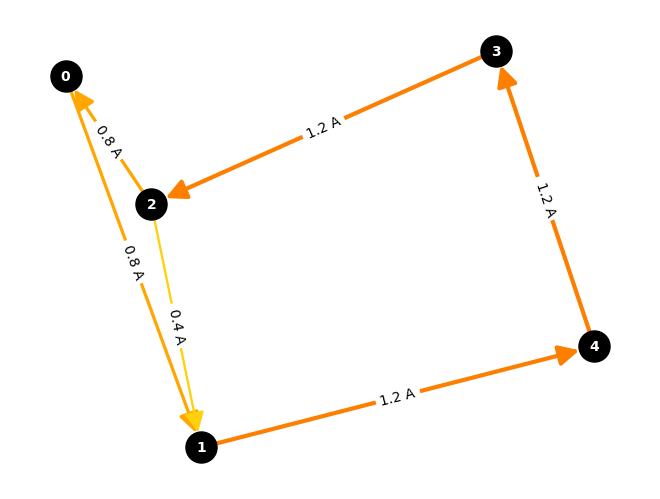

In [12]:
read_circuit_and_solve("circuit.txt")

- Funkcje generujące grafy z wykorzystaniem biblioteki "networkx"

In [13]:
def randomize_resistance(G):
    for e in G.edges():
        G[e[0]][e[1]]['weight']=np.random.random()

def random_graph(n):
    G=nx.gnp_random_graph(n,np.random.randint(n,n*(n-1)//2))
    randomize_resistance(G)
    edges = list(G.edges)
    GG = nx.DiGraph()
    for u, v in edges:
        GG.add_edge(u, v, R=G[u][v]['weight'])
    return GG

def cubic_graph(n):
    G=nx.random_regular_graph(3,n)
    randomize_resistance(G)
    edges = list(G.edges)
    GG = nx.DiGraph()
    for u, v in edges:
        GG.add_edge(u, v, R=G[u][v]['weight'])
    return GG

def double_random_graph(n):
    A = random_graph(n//2)
    B = random_graph(n//2)
    x=len(A.nodes)
    for edge in B.edges:
        A.add_edge(edge[0]+x,edge[1]+x)
    A.add_edge(0,x)
    randomize_resistance(A)
    edges = list(A.edges)
    GG = nx.DiGraph()
    for u, v in edges:
        GG.add_edge(u, v, R=A[u][v]['weight'])
    return GG

def grid_graph(n):
    G = nx.grid_graph(dim=[int(np.sqrt(n)),int(np.sqrt(n))+1], periodic=False)
    mapping = dict(zip(G, range(int(np.sqrt(n))*(int(np.sqrt(n))+1))))
    G = nx.relabel_nodes(G, mapping)
    randomize_resistance(G)
    edges = list(G.edges)
    GG = nx.DiGraph()
    for u, v in edges:
        GG.add_edge(u, v, R=G[u][v]['weight'])
    return GG

def small_world_graph(n):
    G = nx.watts_strogatz_graph(n, 4, 0.2)
    randomize_resistance(G)
    edges = list(G.edges)
    GG = nx.DiGraph()
    for u, v in edges:
        GG.add_edge(u, v, R=G[u][v]['weight'])
    return GG

- Automatyczne testowanie funkcji na różnych grafach

In [14]:
graphs = [random_graph(50), cubic_graph(200), double_random_graph(100), grid_graph(200), small_world_graph(200)]

i = 0
for G in graphs:
    start = time.time()
    G, s, t, E, I, cycles = find_intencities(G, 0, 1, 10)
    if verify_kirchoff(G, s, t, E, max(I), cycles):
        print("Test", i, "passed")
    else :
        print("Test", i, "failed")
    end = time.time()
    print(f"Time elapsed: {end-start:.2f}s")
    i += 1

Test 0 passed
Time elapsed: 3.61s
Test 1 passed
Time elapsed: 0.18s
Test 2 passed
Time elapsed: 19.38s
Test 3 passed
Time elapsed: 0.29s
Test 4 passed
Time elapsed: 0.36s
